#  **This notebook made for the to DataTalksClub Machine Learning Zoomcamp Midterm Project and is made by Lokman Efe and is about Smoking 🚬 and Drinking 🍺 Dataset with body signal.**

# PLEASE READ!
You should download the dataset and change the variables' paths in the scripts to dataset's path but I suggest you to run the scripts in Kaggle notebooks and don't download the data, 
it would be easier since you wouldn't have to download the data, which is over 100 mb's. I developed the project on Kaggle too, so you don't have to change the dataset paths in the scripts, you just have to add the data to your notebook if you work on Kaggle.

Link for the dataset: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data

My Kaggle Profile: https://www.kaggle.com/lokmanefe

My GitHub Profile: https://github.com/lokicik

My LinkedIn Profile: https://www.linkedin.com/in/lokmanefe/

Feel free to reach out! ✌

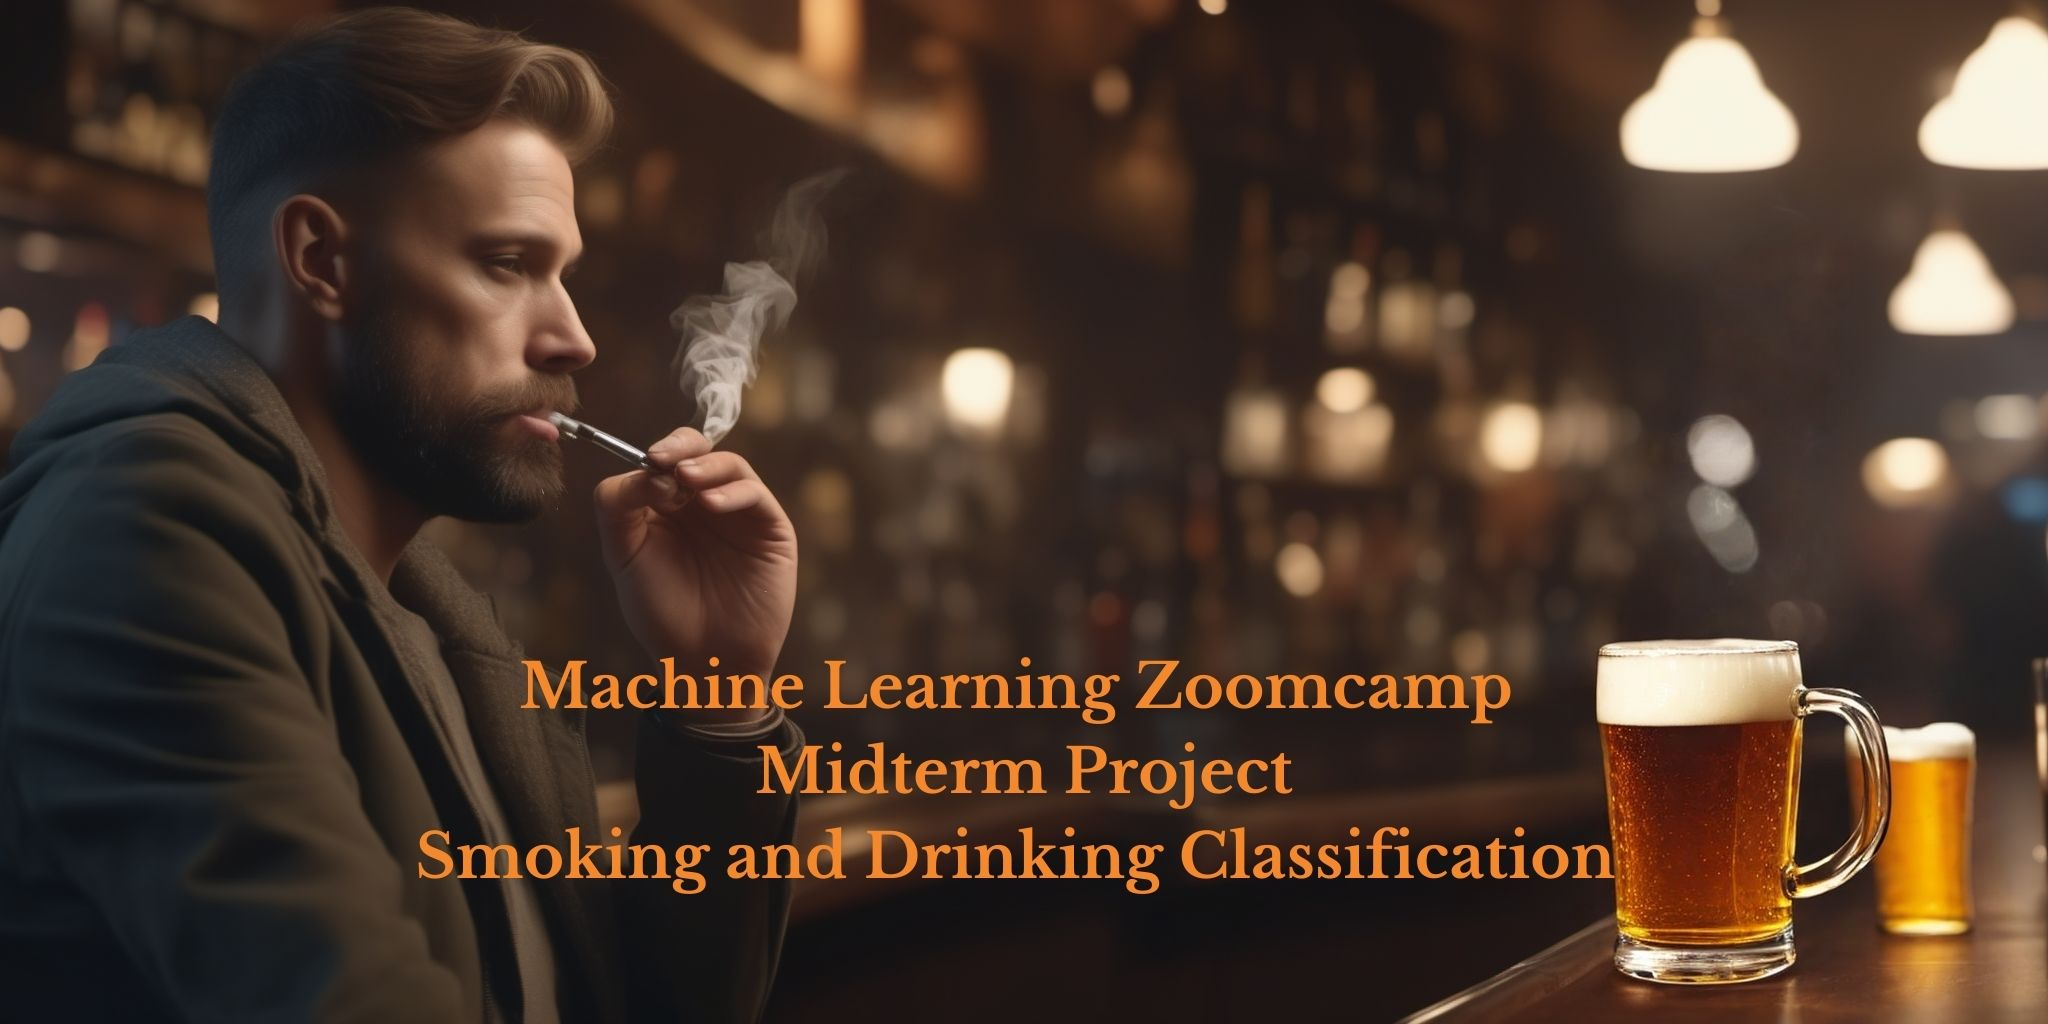

One man sitting in a bar, smoking and drinking, holding the alcohol in his hand hand, cigarette on his mouth, realistic, ultrahd
Negative prompt: bad-hands-5 BadDream badhandv4 easynegative FastNegativeEmbedding happy512 No512-neg UnrealisticDream
Steps: 40, Sampler: Euler a, CFG scale: 7, Seed: 3332556486, Size: 2048x1024, Model hash: 31e35c80fc, Model: sd_xl_base_1.0, Version: v1.6.0

and edited with leonardo.ai

# **Project Overview**

### **Project Presentation**

I would like to introduce my most comprehensive project to date! I have completed the project "Drinking or Smoking Classification" which I developed as the Midterm Project during the 7th week of the Machine Learning Zoomcamp organized by DataTalksClub and presented by Alexey Grigorev. I had the opportunity to apply all the techniques I learned, and I gave my all to this project. I look forward to your feedback and hope for positive reviews!

### **Problem Description**

  Besides regular users of smoke and alcohol, passive smokers and non-regular drinkers are getting their body hurt aswell. This project can be used to determine if a passive smoker or a non-regular drinker doing how much damage to their body and know about if they are smoking or drinking as much as a regular users, so they can lower their usage of drinking or smoking. This project also can be used to determine if a child is smoking or drinking, his/her body is affected by the smokers or drinkers around him/her or not.

### **Problem Solution**

I've used the dataset to develop 2 different models, one for Alcohol Drinking Prediction, and one for Smoking Prediction. The reason I did this is so that the user can input a single record and get the results from both models, drinking and smoking probability. The target variable for the drinking model is "DRK_YN",  for the smoking model it's "SMK_stat_type_cd". I've  extracted the target variables from the dataset and trained models separately. The Smoking Model is a multiclass -can be binary if predictions for 0 and 1 is summarized in prediction 0, which would mean not drinker, and 1 stays 1 which already stands for drinker- classification model which predicts 0/1/2 (never smoked/smoked but quit/smoker). The Drinking Model is a binary classification model which predicts 0/1(drinker/not drinker).

### **Dataset**

This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded.
The purpose of this dataset is to:


*   Analysis of body signal
*   Classification of smoker or drinker


   







**Details of dataset:**

*   Sex	male, female
*   age	round up to 5 years
*   height	round up to 5 cm[cm]
*   weight	[kg]
*   sight_left	eyesight(left)
*   sight_right	eyesight(right)
*   hear_left	hearing left, 1(normal), 2(abnormal)
*   hear_right	hearing right, 1(normal), 2(abnormal)
*   SBP	Systolic blood pressure[mmHg]
*   DBP	Diastolic blood pressure[mmHg]
*   BLDS	BLDS or FSG(fasting blood glucose)[mg/dL]
*   tot_chole	total cholesterol[mg/dL]
*   HDL_chole	HDL cholesterol[mg/dL]
*   LDL_chole	LDL cholesterol[mg/dL]
*   triglyceride	triglyceride[mg/dL]
*   hemoglobin	hemoglobin[g/dL]
*   urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
*   serum_creatinine	serum(blood) creatinine[mg/dL]
*   SGOT_AST	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
*   SGOT_ALT	ALT(Alanine transaminase)[IU/L]
*   gamma_GTP	y-glutamyl transpeptidase[IU/L]

*   SMK_stat_type_cd	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
*   DRK_YN	Drinker or Not








### **Midterm Project Requirements (Evaluation Criteria)**

* Problem description
* EDA
* Model training
* Exporting notebook to script
* Model deployment
* Reproducibility
* Dependency and environment management
* Containerization
* Cloud deployment

# **Imports and Options**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error,f1_score,classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# **Data Preparation**

In [2]:
df = pd.read_csv("/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv")

In [3]:
df_original = pd.read_csv("/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv")

# **Pre-Analysis**

In [4]:
def check_df(dataframe):
    """
    Perform a quick examination of a DataFrame, including its shape, data types, head, missing values, duplicated rows, quantiles, and number of unique values.

    Args:
        dataframe (pd.DataFrame): The DataFrame to be examined.

    Returns:
        None
    """
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Types #####################")
    print(dataframe.dtypes)
    print("\n##################### Head #####################")
    print(dataframe.head())
    print("\n##################### NA #####################")
    print(dataframe.isnull().sum())
    print("\n##################### Duplicated Rows #####################")
    print(dataframe.duplicated().sum())
    print("\n##################### Quantiles #####################")
    print(dataframe.describe().T)
    print("\n##################### Number of Unique Values #####################")
    for col in dataframe.columns:
        print(col, dataframe[col].nunique())


check_df(df)

##################### Shape #####################
(991346, 24)

##################### Types #####################
sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

##################### Head #####################
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0       

## **What info can we extract from Pre-Analysis part?**

> The dataset has 24 variables (columns) and near 1 million of records (rows).

> There are 26 duplicated rows, we can clean them.

> There are only 2 object variables (categorical columns) and they are "sex" and "DRK_YN".

> There are no NA values, that's good thing. There still might be NA values, not in np.nan() form but represented as high numerical values.

> Some columns have max values of "999.0" or "9999.0". There is something weird with these columns. We'll analyze them further in the EDA (Exploratory
> Data Analysis) part.

> Some of the variables have low unique value count, we can encode them with label encoding or one hot encoding to increase our model's performance.

**I'll note the columns which have high values like 9.9, 999.0 or 9999.0 as a list.**

In [5]:
possible_na = ["waistline", "sight_left", "sight_right", "SGOT_AST", "gamma_GTP"]

**Let's take a further look at the variables.**


In [6]:
def grab_col_names(df, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric, and categorical cardinal variables in the dataset.
    Note: Numeric variables with a categorical appearance are also included in the categorical variables.

    Parameters
    ------
        df: DataFrame
                The DataFrame for which variable names are to be retrieved.
        cat_th: int, optional
                Class threshold value for numeric but categorical variables.
        car_th: int, optional
                Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variables.
        num_cols: list
                List of numeric variables.
        cat_but_car: list
                List of categorical variables that appear to be cardinal.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = the total number of variables.
        num_but_cat is included in cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables: cat_cols + num_cols + cat_but_car = the number of variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations(Rows): {df.shape[0]}")
    print(f"Variables(Columns): {df.shape[1]}\n")
    print(f'cat_cols: {len(cat_cols)}\nnum_cols: {len(num_cols)}\ncat_but_car: {len(cat_but_car)}\nnum_but_cat: {len(num_but_cat)}')
    print(f"\ncat_cols: {cat_cols}\nnum_cols: {num_cols}\ncat_but_car: {cat_but_car}\n")

    print(f"\ncat_cols data types:\n\n{df[cat_cols].dtypes}\n\nnum_cols data types:\n\n{df[num_cols].dtypes}\n\ncat_but_car data types:\n\n{df[cat_but_car].dtypes}")

    return cat_cols, num_cols, cat_but_car

**grab_col_names() makes us grab a hold of the variables by their type. Let's use it.**

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Rows): 991346
Variables(Columns): 24

cat_cols: 6
num_cols: 18
cat_but_car: 0
num_but_cat: 4

cat_cols: ['sex', 'DRK_YN', 'hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']
num_cols: ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
cat_but_car: []


cat_cols data types:

sex                  object
DRK_YN               object
hear_left           float64
hear_right          float64
urine_protein       float64
SMK_stat_type_cd    float64
dtype: object

num_cols data types:

age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           

 We see that there is 6 categorical and 18 numerical variables. 4 of the categorical variables are numerical but since they have low unique value count (as we saw in the Pre-Analysis part) they are considered categorical too.

# **Exploratory Data Analysis (EDA)**

First we should label encode "sex" and "DRK_YN" categorical variables to make them numerical, and change the values of "SMK_stat_type_cd", so we can handle them better.

In [8]:
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})

smk_stat_mapping = {1: 0, 2: 1, 3: 2}
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map(smk_stat_mapping)

We had some duplicated rows, we can drop them now.

In [9]:
df = df.drop_duplicates()

Before looking at the outliers, let's check the missing values first.
## **Handling Missing Values**

When we try to look for missing values,

In [10]:
df.isnull().any()

sex                 False
age                 False
height              False
weight              False
waistline           False
sight_left          False
sight_right         False
hear_left           False
hear_right          False
SBP                 False
DBP                 False
BLDS                False
tot_chole           False
HDL_chole           False
LDL_chole           False
triglyceride        False
hemoglobin          False
urine_protein       False
serum_creatinine    False
SGOT_AST            False
SGOT_ALT            False
gamma_GTP           False
SMK_stat_type_cd    False
DRK_YN              False
dtype: bool

we see that there is no missing values. But there are some values which is like 999.0 or 9999.0. These values must not be correct, because according to domain knowledge these values are incredibly high and likely not possible, they are invalid. There might be a limit to enter data for the source of the dataset, they might be higher values but they are 999.0 topped etc. We don't know about that because they are all the same and useless to us. Since we have too many rows (nearly a million), we can drop these values.

We have those "high numerical" columns as a list, remember possible_na?

In [11]:
print(possible_na)

['waistline', 'sight_left', 'sight_right', 'SGOT_AST', 'gamma_GTP']


Time to drop the max values of columns in possible_na.

In [12]:
for column in possible_na:
    df = df[df[column] != df[column].max()]

There are still high values in the data set, but we should assume that if a person is extremely sick, these values are probably achieveable. We don't need to operate on them. We have handled missing values.

(I have even discussed them with a friend of mine whom studies medicine.)



We can take a look at the dataset again.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,985283.0,0.530715,0.499056,0.0,0.0,1.0,1.0,1.0
age,985283.0,47.534602,14.146143,20.0,35.0,45.0,60.0,85.0
height,985283.0,162.259681,9.278972,130.0,155.0,160.0,170.0,190.0
weight,985283.0,63.298403,12.518547,25.0,55.0,60.0,70.0,140.0
waistline,985283.0,81.166575,9.593146,8.0,74.0,81.0,87.6,149.1
sight_left,985283.0,0.953213,0.341180,0.1,0.7,1.0,1.2,2.5
sight_right,985283.0,0.950827,0.339703,0.1,0.7,1.0,1.2,2.5
hear_left,985283.0,1.031064,0.173491,1.0,1.0,1.0,1.0,2.0
hear_right,985283.0,1.030069,0.170776,1.0,1.0,1.0,1.0,2.0
SBP,985283.0,122.400476,14.527961,70.0,112.0,120.0,131.0,273.0


## **Outlier Detection**

"Outlier Detection" involves the identification of data points that are notably different from the majority of the dataset. It plays a critical role in data analysis by helping to spot errors, anomalies, and rare occurrences. Detecting outliers is essential for improving data quality, ensuring data integrity, and making informed decisions in various domains, including finance, healthcare, and quality control.

Let's try to catch those outliers with the functions below.

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Calculate lower and upper thresholds for detecting outliers in a column of a DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column for which outliers will be detected.
        q1 (float): The lower quantile value to determine the lower threshold.
        q3 (float): The upper quantile value to determine the upper threshold.

    Returns:
        float: The lower threshold value.
        float: The upper threshold value.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(df, col_name):
    """
    Check for outliers in a column of a DataFrame based on specified thresholds.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column to check for outliers.

    Returns:
        bool: True if outliers are found, False if not.
    """
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


outlier_cols = []
for col in num_cols:
    if check_outlier(df, col):
        outlier_cols.append(col)
        print(col)

waistline
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP


We can suppress the values that are over the thresholds.

In [15]:
def winsorize(dataframe, col_name, lower_quantile=0.05, upper_quantile=0.95):
    """
    Apply Winsorization to a specific column in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column to winsorize.
        lower_quantile (float): The lower quantile value for determining the lower limit.
        upper_quantile (float): The upper quantile value for determining the upper limit.

    Returns:
        None
    """
    lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, q1=lower_quantile, q3=upper_quantile)
    dataframe[col_name] = dataframe[col_name].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))


# Defining lower and upper quantiles for Winsorization
lower_quantile = 0.05
upper_quantile = 0.95

# Apply Winsorization
for col in outlier_cols:
    winsorize(df, col, lower_quantile, upper_quantile)

## **Data Visualization**
We can understand our data better if we can visualize it by breaking the data down to smaller parts. (only one of the target variables used for num_summary to keep things simple, "DRK_YN".)

Summary for 'sex':
        sex      Ratio
sex                   
1    522904  53.071453
0    462379  46.928547
##########################################


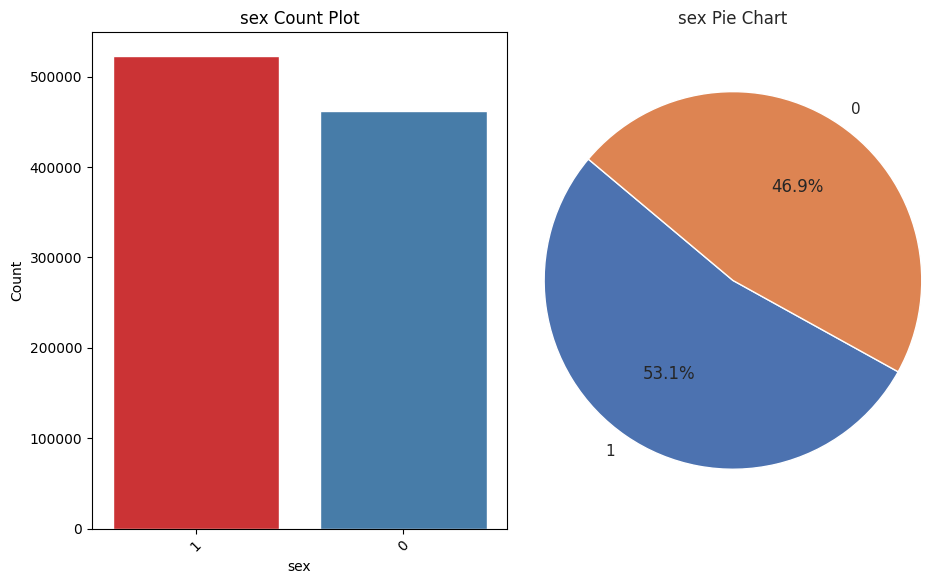

Summary for 'DRK_YN':
        DRK_YN      Ratio
DRK_YN                   
1       493252  50.061962
0       492031  49.938038
##########################################


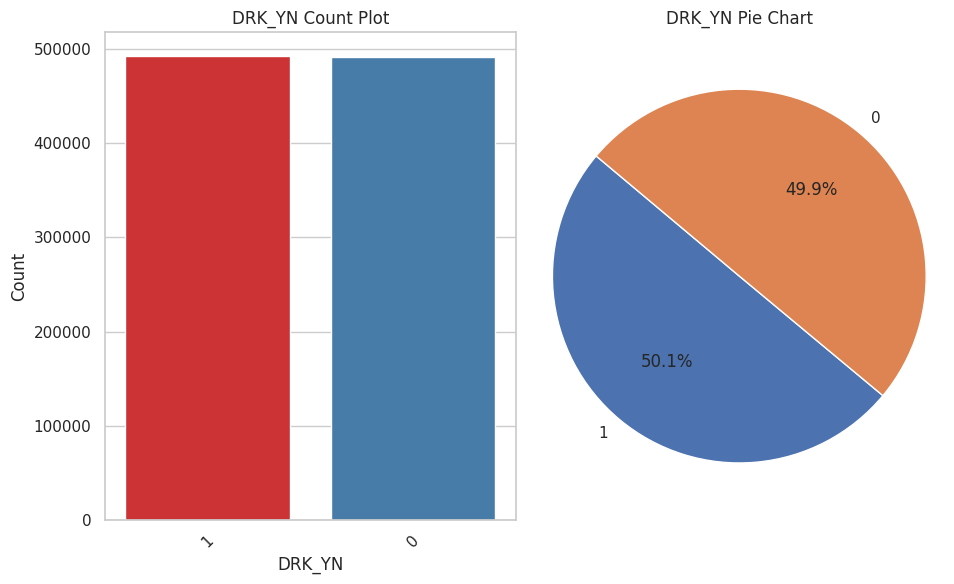

Summary for 'hear_left':
           hear_left      Ratio
hear_left                      
1.0           954676  96.893583
2.0            30607   3.106417
##########################################


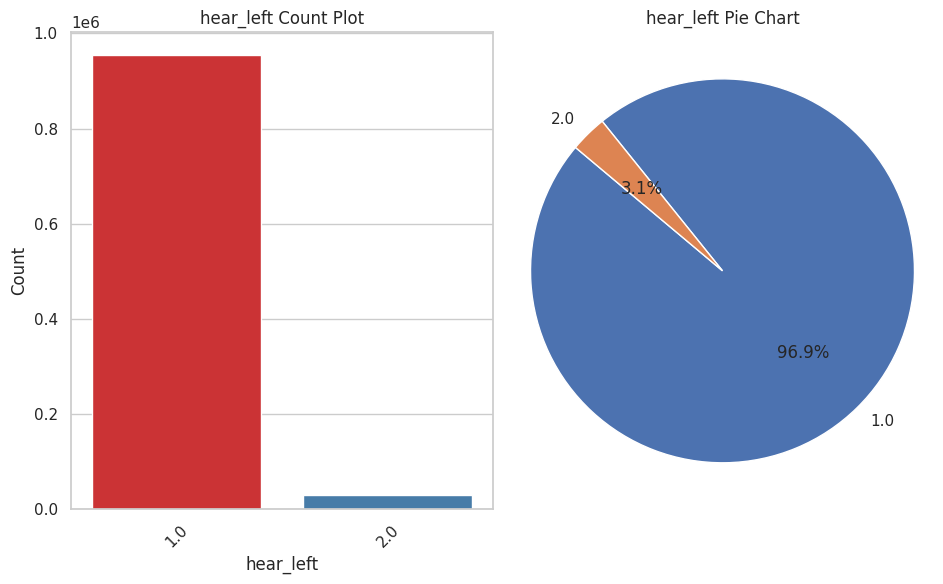

Summary for 'hear_right':
            hear_right      Ratio
hear_right                       
1.0             955657  96.993148
2.0              29626   3.006852
##########################################


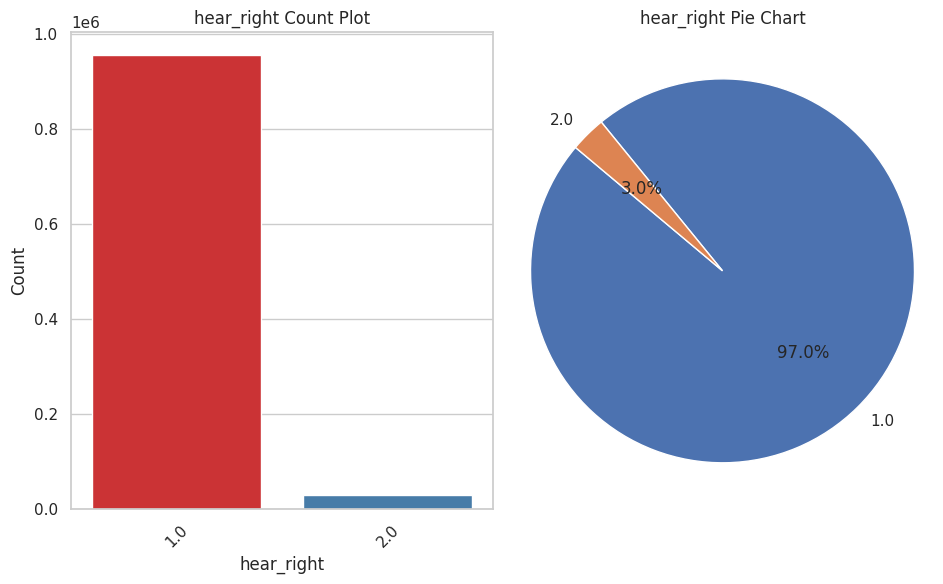

Summary for 'urine_protein':
               urine_protein      Ratio
urine_protein                          
1.0                   929669  94.355530
2.0                    30622   3.107940
3.0                    16226   1.646836
4.0                     6325   0.641948
5.0                     1943   0.197202
6.0                      498   0.050544
##########################################


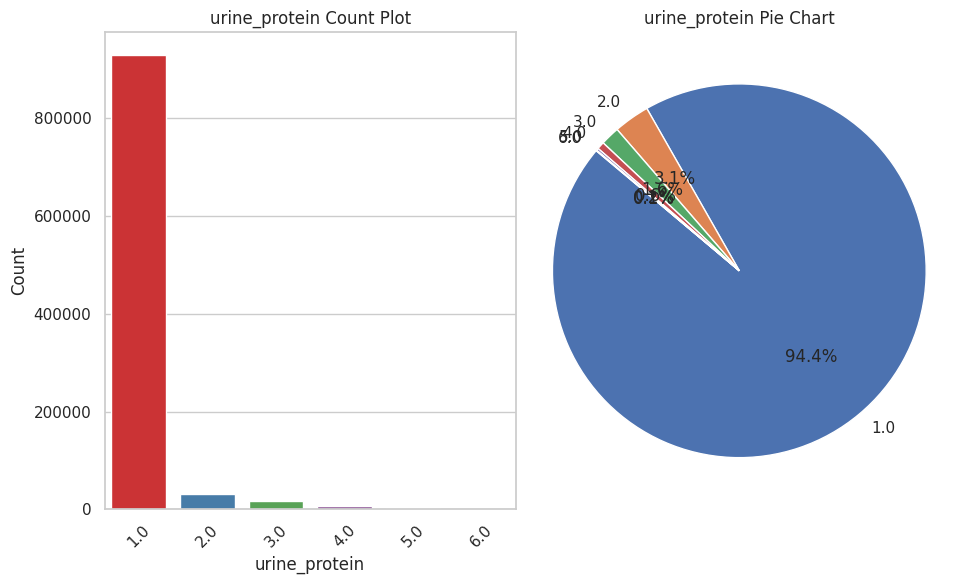

Summary for 'SMK_stat_type_cd':
                  SMK_stat_type_cd      Ratio
SMK_stat_type_cd                             
0                           598806  60.775026
2                           212745  21.592273
1                           173732  17.632700
##########################################


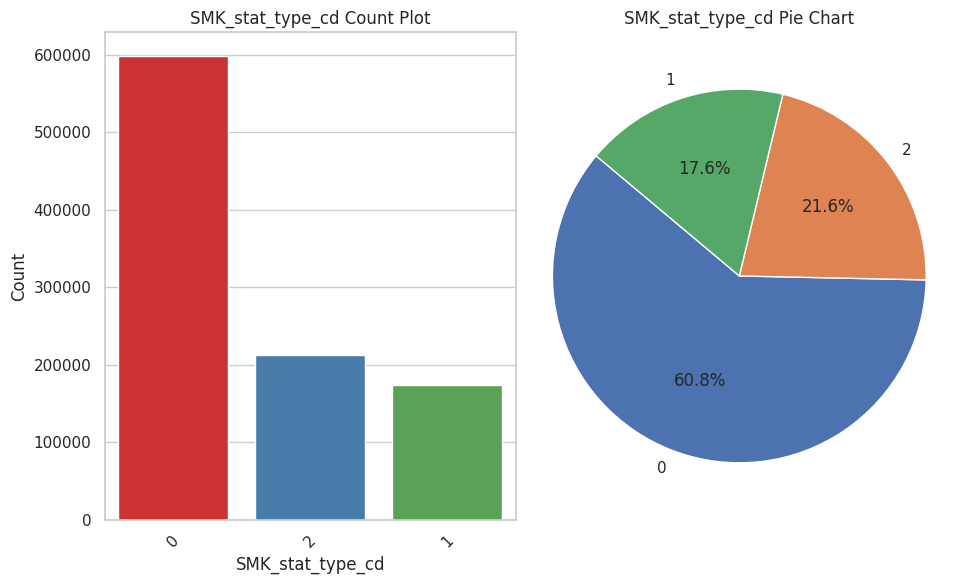

In [16]:
def cat_summary(dataframe, col_name, plot=True):
    """
    Generate a summary for a categorical column in a DataFrame, including value counts, ratios, and optional plots.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the categorical column to summarize.
        plot (bool, optional): Whether to generate plots (count plot and pie chart). Default is True.

    Returns:
        None
    """
    value_counts = dataframe[col_name].value_counts()
    value_ratios = 100 * value_counts / len(dataframe)

    summary_df = pd.DataFrame({col_name: value_counts, "Ratio": value_ratios})

    print(f"Summary for '{col_name}':")
    print(summary_df)
    print("##########################################")

    if plot:
        plt.figure(figsize=(14, 6))

        # Count Plot
        plt.subplot(1, 3, 1)
        sns.set(style="whitegrid")
        sns.countplot(x=col_name, data=dataframe, palette="Set1", order=value_counts.index)
        plt.xticks(rotation=45)
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.title(f"{col_name} Count Plot")

        # Pie Chart
        plt.subplot(1, 3, 2)
        labels = value_counts.index
        sizes = value_counts.values
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title(f"{col_name} Pie Chart")

        plt.tight_layout()
        plt.show()


for col in cat_cols:
    cat_summary(df, col, True)


Statistics for 'age' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        51.557188      43.521973
std         14.345030      12.736516
min         20.000000      20.000000
5%          25.000000      25.000000
10%         30.000000      25.000000
20%         40.000000      30.000000
30%         45.000000      35.000000
40%         50.000000      40.000000
50%         50.000000      45.000000
60%         55.000000      45.000000
70%         60.000000      50.000000
80%         65.000000      55.000000
90%         70.000000      60.000000
95%         75.000000      65.000000
99%         80.000000      75.000000
max         85.000000      85.000000


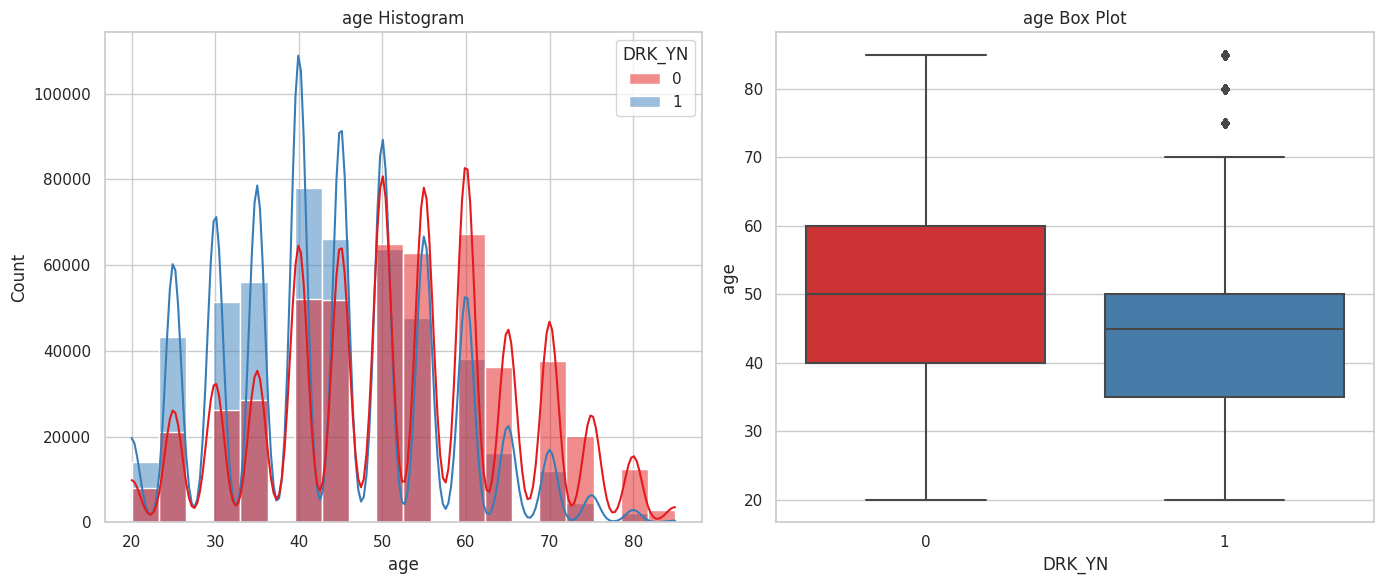


Statistics for 'height' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean       158.783816     165.726941
std          8.923699       8.275067
min        130.000000     130.000000
5%         145.000000     150.000000
10%        150.000000     155.000000
20%        150.000000     160.000000
30%        155.000000     160.000000
40%        155.000000     165.000000
50%        160.000000     165.000000
60%        160.000000     170.000000
70%        165.000000     170.000000
80%        165.000000     175.000000
90%        170.000000     175.000000
95%        175.000000     180.000000
99%        180.000000     185.000000
max        190.000000     190.000000


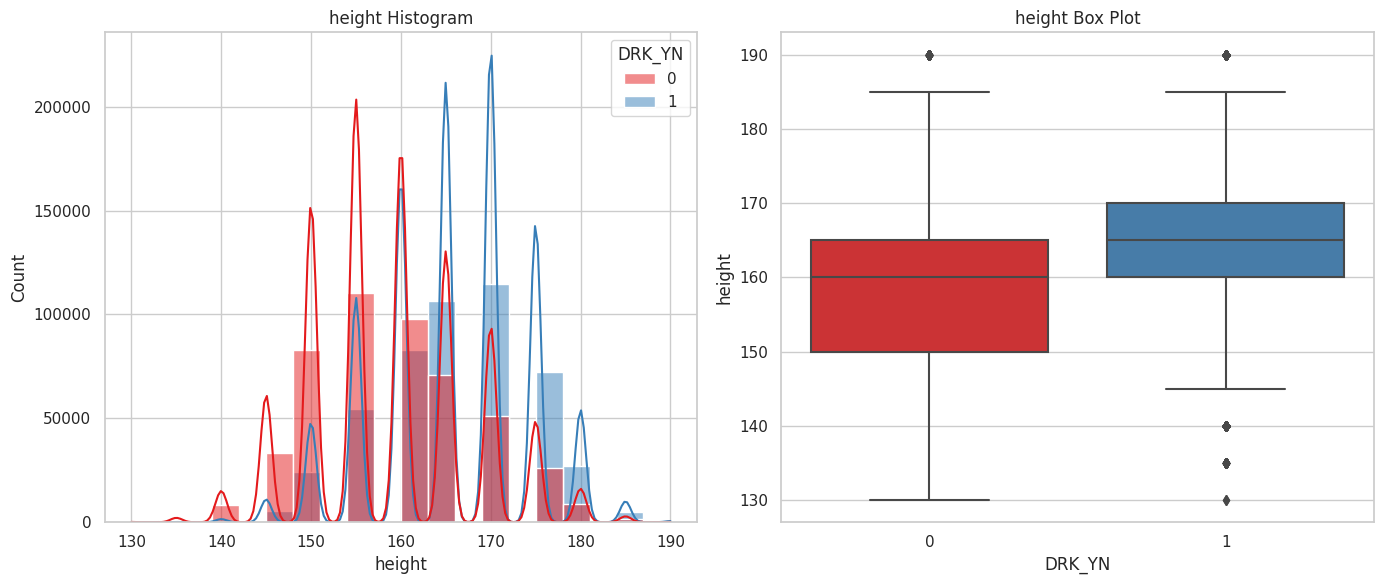


Statistics for 'weight' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        59.988517      66.600095
std         11.544416      12.580435
min         25.000000      30.000000
5%          45.000000      50.000000
10%         45.000000      50.000000
20%         50.000000      55.000000
30%         55.000000      60.000000
40%         55.000000      65.000000
50%         60.000000      65.000000
60%         60.000000      70.000000
70%         65.000000      75.000000
80%         70.000000      75.000000
90%         75.000000      85.000000
95%         80.000000      90.000000
99%         95.000000     100.000000
max        140.000000     140.000000


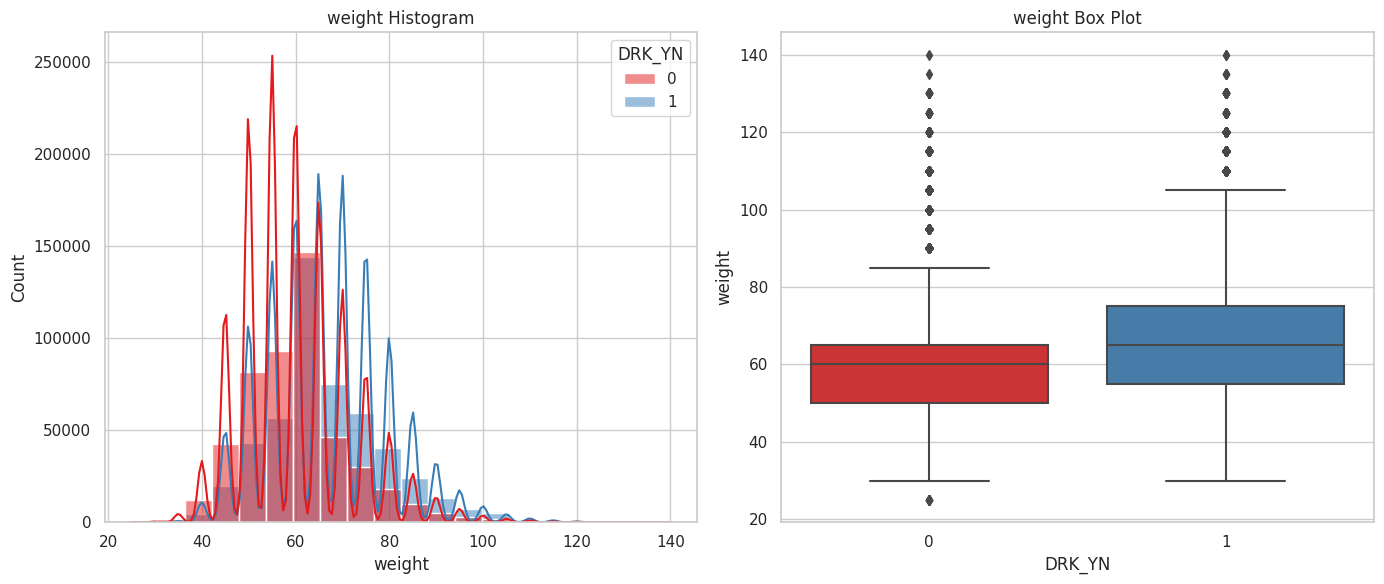


Statistics for 'waistline' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        80.006471      82.323816
std          9.511540       9.533997
min         19.500000      43.000000
5%          65.000000      66.000000
10%         68.000000      70.000000
20%         71.600000      74.000000
30%         75.000000      77.500000
40%         77.000000      80.000000
50%         80.000000      82.500000
60%         82.000000      85.000000
70%         85.000000      87.000000
80%         88.000000      90.000000
90%         92.000000      94.000000
95%         96.000000      98.000000
99%        104.000000     105.100000
max        143.500000     143.500000


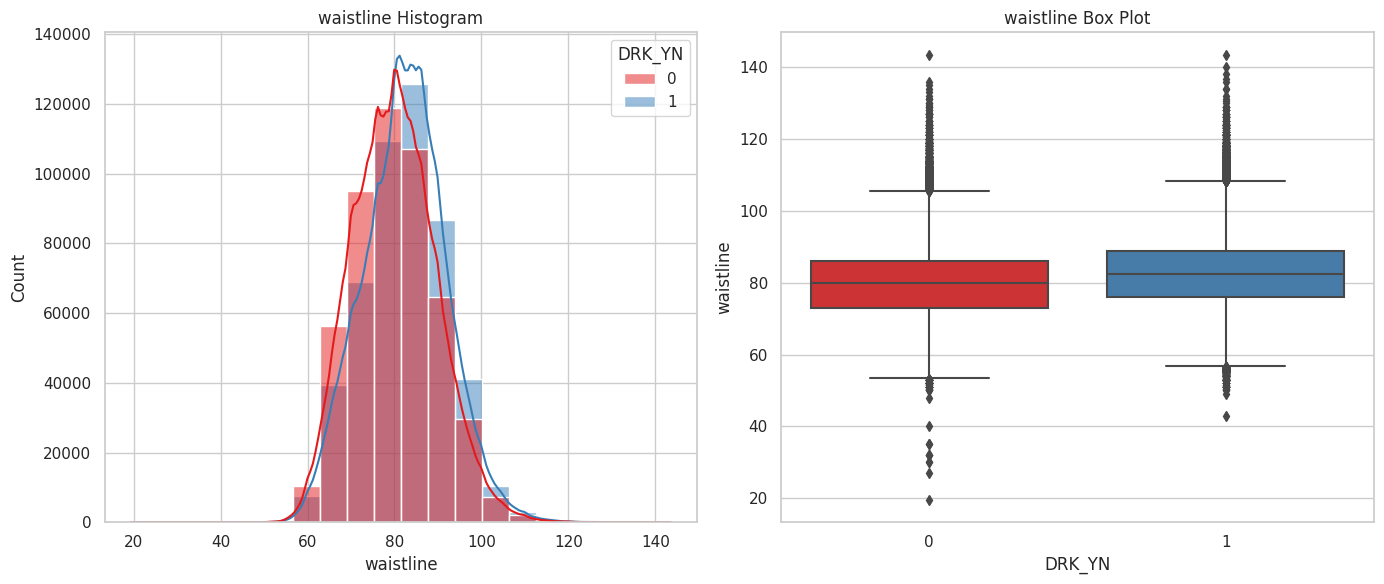


Statistics for 'sight_left' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean         0.897679       1.008609
std          0.339681       0.333583
min          0.100000       0.100000
5%           0.300000       0.400000
10%          0.500000       0.600000
20%          0.600000       0.700000
30%          0.700000       0.900000
40%          0.800000       1.000000
50%          0.900000       1.000000
60%          1.000000       1.000000
70%          1.000000       1.200000
80%          1.200000       1.200000
90%          1.500000       1.500000
95%          1.500000       1.500000
99%          1.500000       2.000000
max          2.500000       2.500000


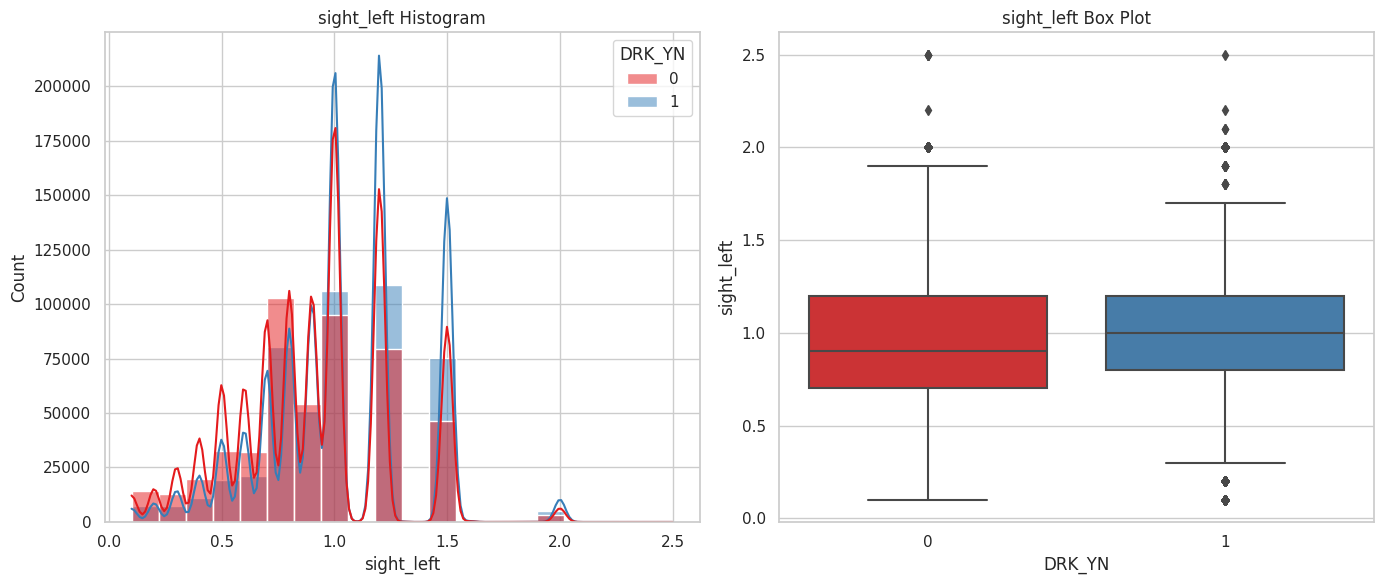


Statistics for 'sight_right' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean         0.895957       1.005561
std          0.337875       0.332619
min          0.100000       0.100000
5%           0.300000       0.400000
10%          0.500000       0.600000
20%          0.600000       0.700000
30%          0.700000       0.900000
40%          0.800000       0.900000
50%          0.900000       1.000000
60%          1.000000       1.000000
70%          1.000000       1.200000
80%          1.200000       1.200000
90%          1.200000       1.500000
95%          1.500000       1.500000
99%          1.500000       1.500000
max          2.500000       2.500000


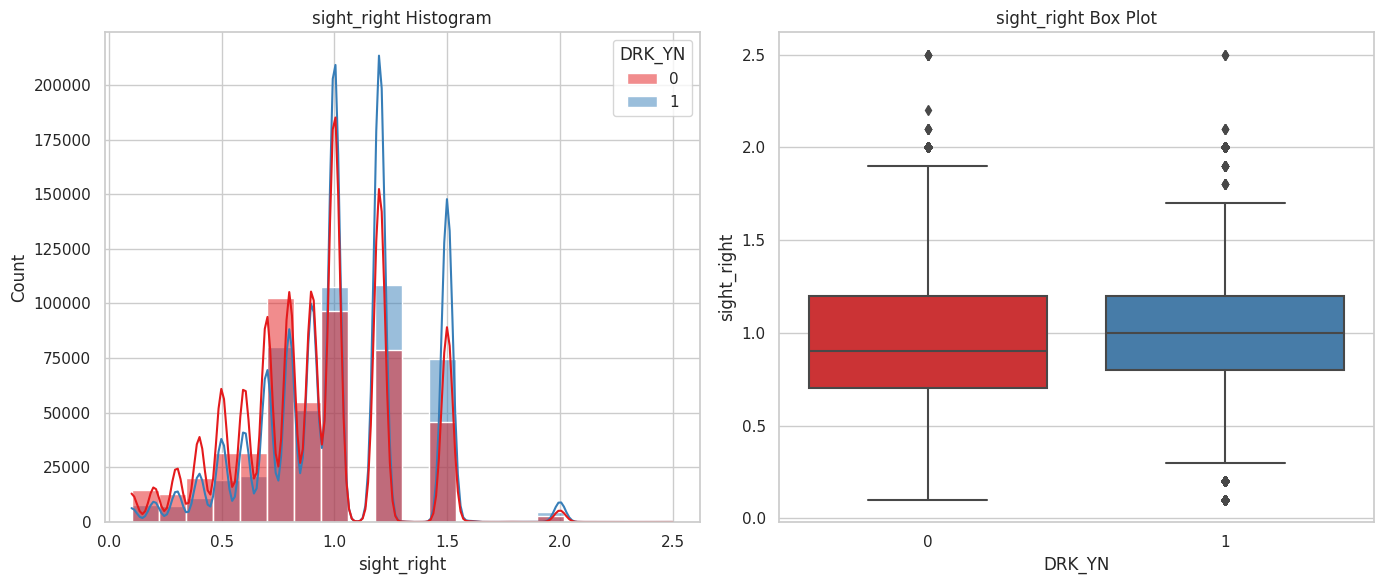


Statistics for 'SBP' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean       121.910821     122.888007
std         14.871886      14.152655
min         70.000000      73.000000
5%         100.000000     100.000000
10%        103.000000     106.000000
20%        110.000000     110.000000
30%        113.000000     115.000000
40%        118.000000     119.000000
50%        120.000000     121.000000
60%        125.000000     126.000000
70%        130.000000     130.000000
80%        134.000000     134.000000
90%        140.000000     139.000000
95%        148.000000     147.000000
99%        162.000000     161.000000
max        220.000000     220.000000


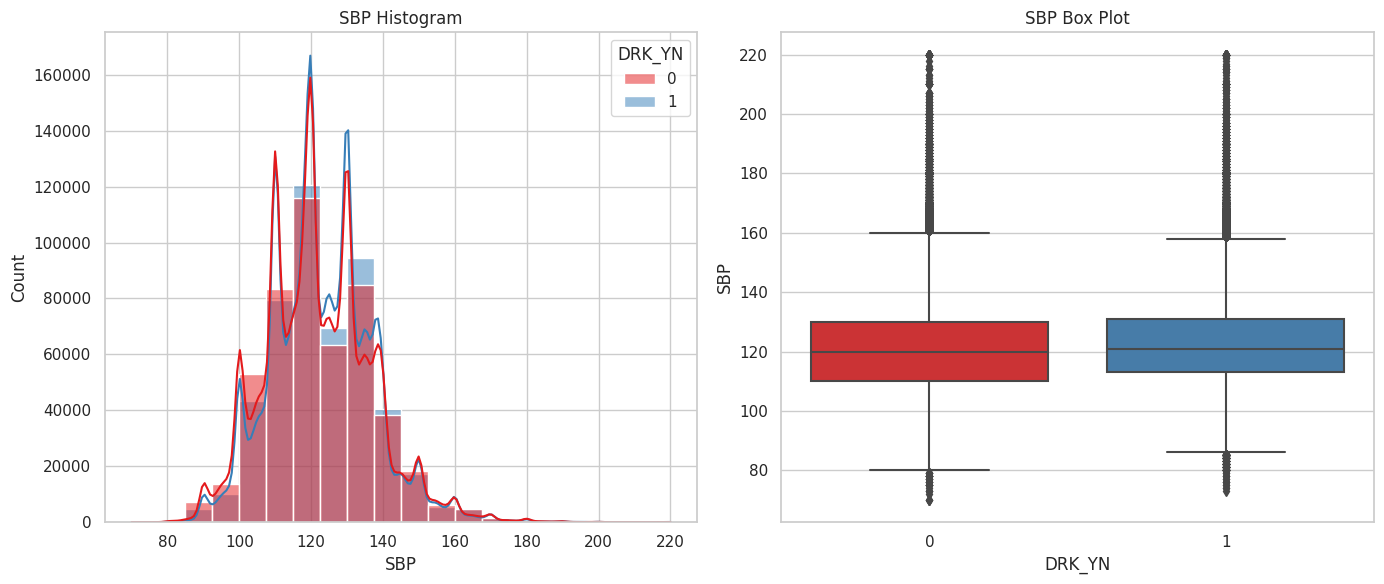


Statistics for 'DBP' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        75.047385      77.042335
std          9.666554       9.995147
min         33.000000      34.000000
5%          60.000000      60.000000
10%         62.000000      64.000000
20%         67.000000      70.000000
30%         70.000000      70.000000
40%         72.000000      74.000000
50%         75.000000      78.000000
60%         78.000000      80.000000
70%         80.000000      81.000000
80%         82.000000      85.000000
90%         88.000000      89.000000
95%         90.000000      94.000000
99%        100.000000     104.000000
max        140.000000     140.000000


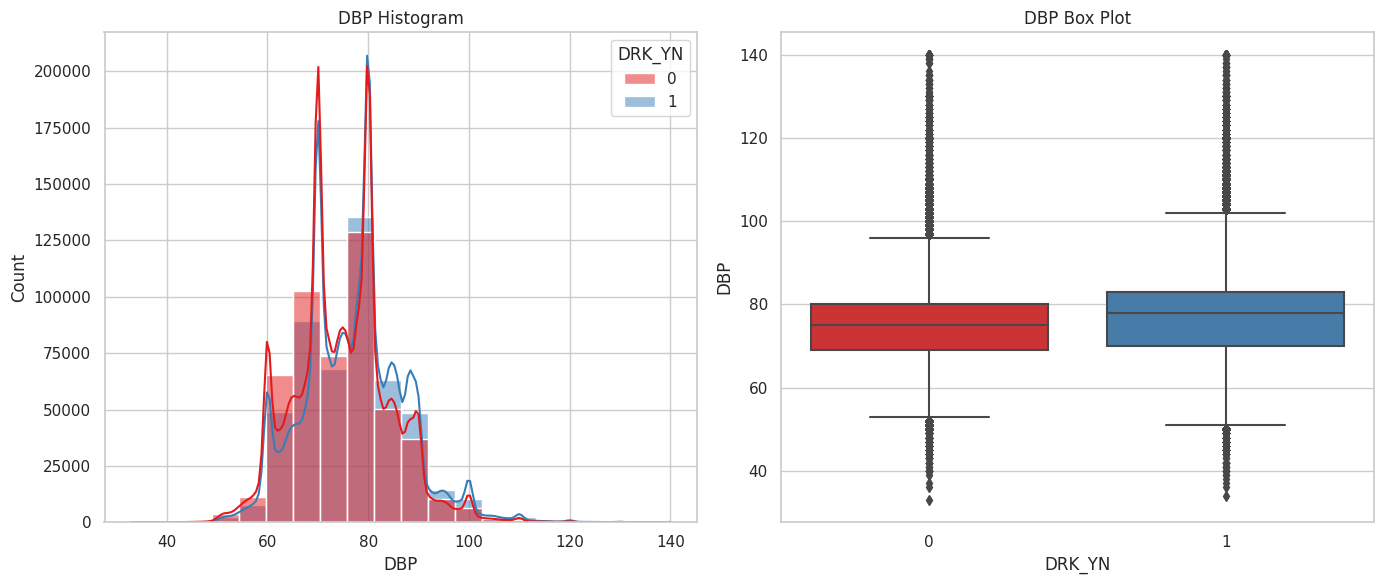


Statistics for 'BLDS' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        99.659316     100.370675
std         21.462441      21.099838
min         25.000000      30.000000
5%          78.000000      79.000000
10%         82.000000      83.000000
20%         86.000000      87.000000
30%         90.000000      90.000000
40%         92.000000      93.000000
50%         95.000000      96.000000
60%         98.000000      99.000000
70%        102.000000     103.000000
80%        108.000000     108.000000
90%        120.000000     120.000000
95%        138.000000     136.000000
99%        202.000000     204.000000
max        224.000000     224.000000


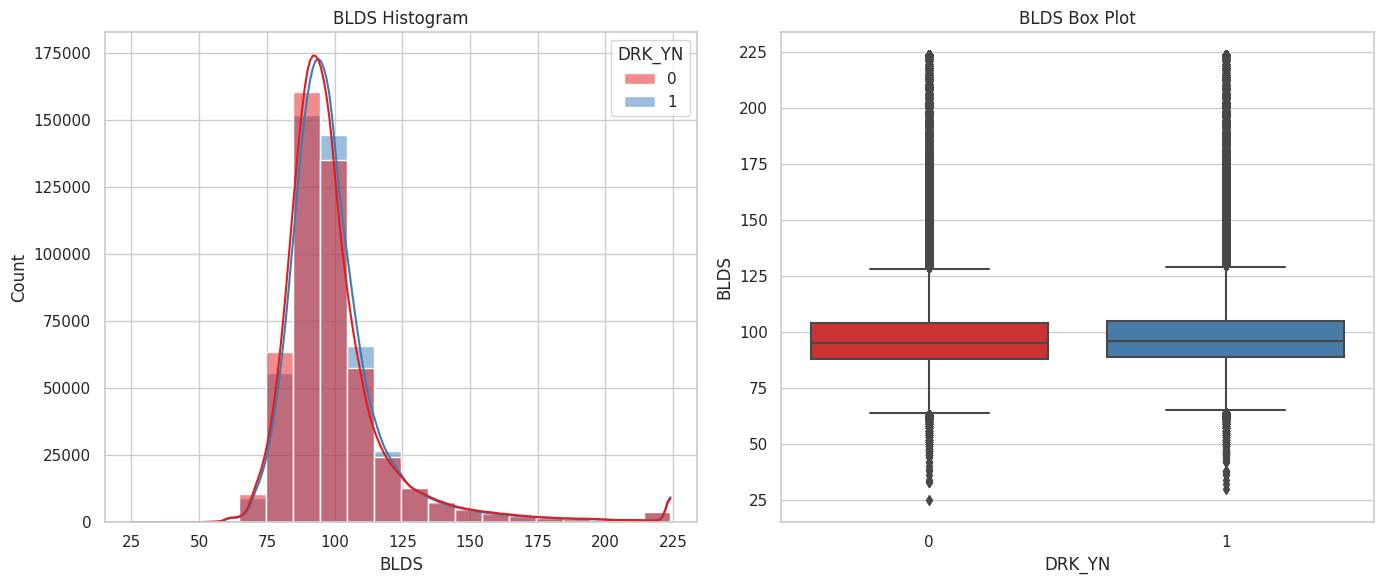


Statistics for 'tot_chole' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean       194.818745     196.296808
std         38.944074      37.142915
min         45.000000      30.000000
5%         135.000000     140.000000
10%        147.000000     151.000000
20%        162.000000     165.000000
30%        173.000000     176.000000
40%        183.000000     185.000000
50%        193.000000     194.000000
60%        202.000000     203.000000
70%        213.000000     213.000000
80%        226.000000     226.000000
90%        245.000000     244.000000
95%        262.000000     260.000000
99%        297.000000     295.000000
max        447.000000     447.000000


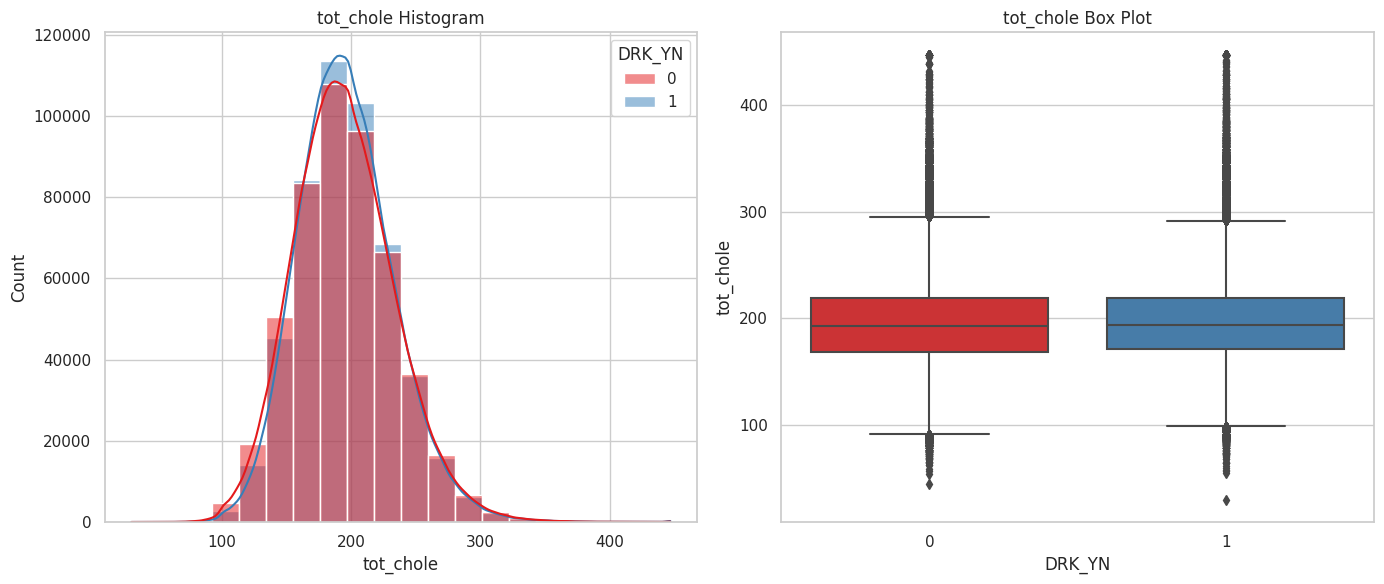


Statistics for 'HDL_chole' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean        56.192337      57.666128
std         14.491693      15.246558
min          1.000000       2.000000
5%          36.000000      37.000000
10%         39.000000      40.000000
20%         44.000000      45.000000
30%         48.000000      49.000000
40%         51.000000      52.000000
50%         55.000000      56.000000
60%         58.000000      59.000000
70%         62.000000      64.000000
80%         68.000000      69.000000
90%         75.000000      78.000000
95%         82.000000      86.000000
99%         97.000000     102.000000
max        156.000000     156.000000


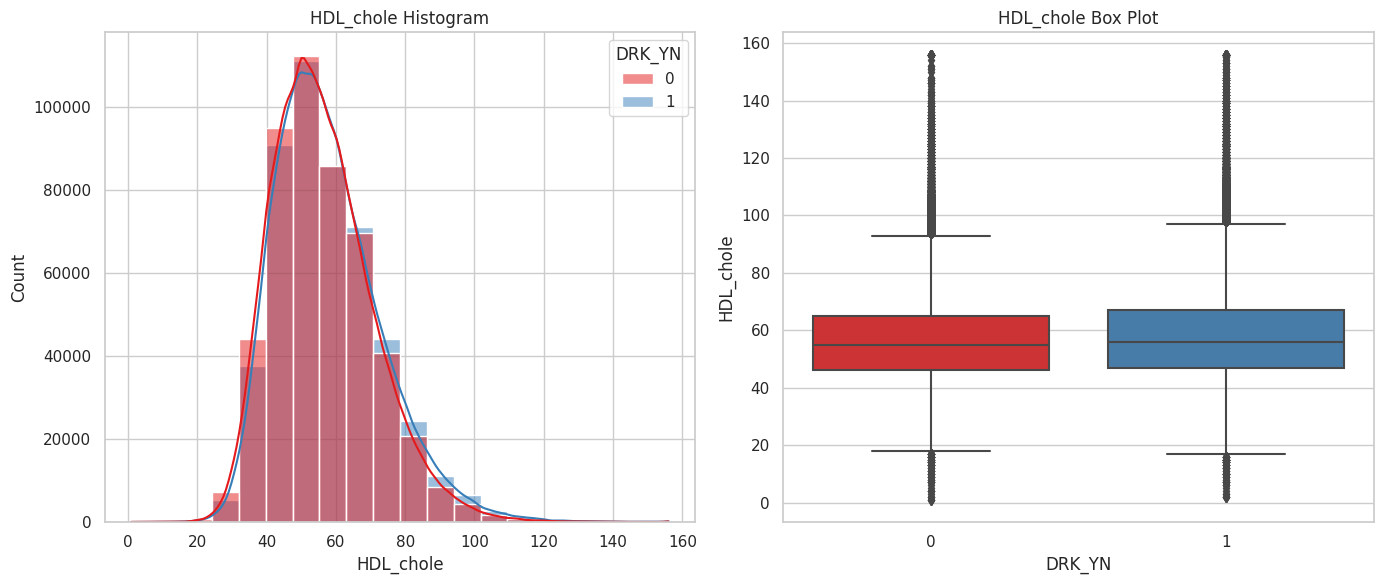


Statistics for 'LDL_chole' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean       114.589593     111.452485
std         35.037571      33.953133
min          1.000000       1.000000
5%          61.000000      59.000000
10%         71.000000      70.000000
20%         85.000000      83.000000
30%         95.000000      93.000000
40%        104.000000     101.000000
50%        113.000000     110.000000
60%        121.000000     118.000000
70%        131.000000     128.000000
80%        143.000000     139.000000
90%        160.000000     155.000000
95%        175.000000     169.000000
99%        206.000000     199.000000
max        340.000000     340.000000


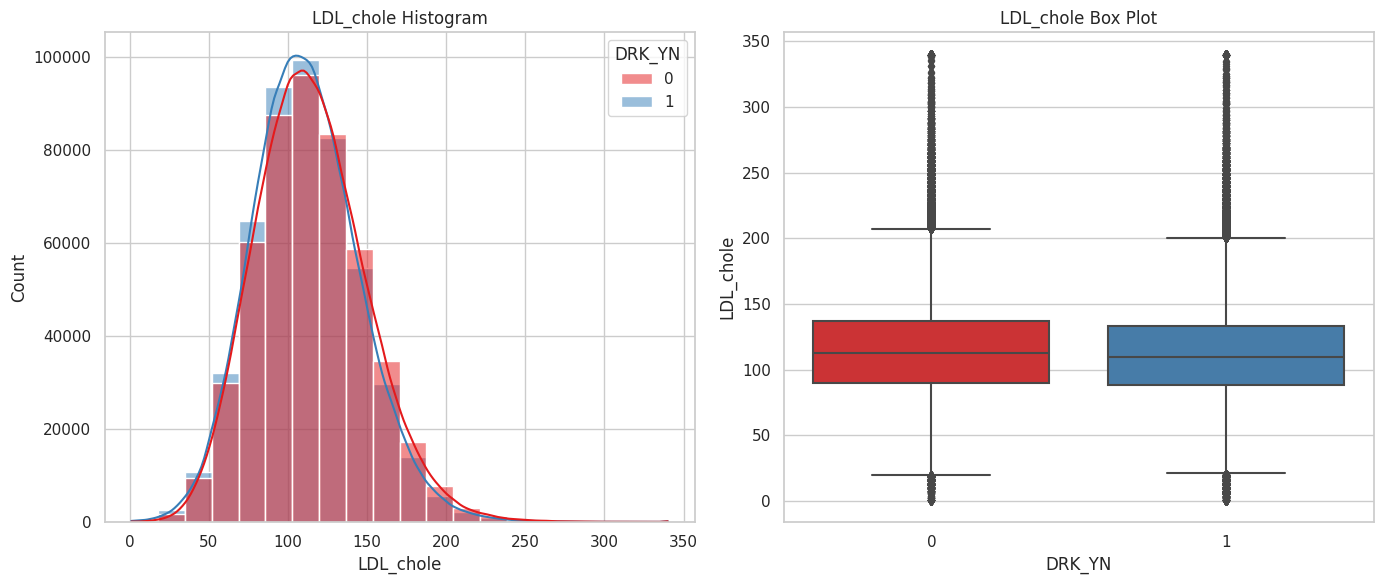


Statistics for 'triglyceride' Grouped by DRK_YN
DRK_YN              0              1
count   492031.000000  493252.000000
mean       120.972622     140.654447
std         75.676747     100.431627
min          1.000000       1.000000
5%          45.000000      47.000000
10%         53.000000      55.000000
20%         66.000000      69.000000
30%         77.000000      82.000000
40%         89.000000      96.000000
50%        102.000000     112.000000
60%        117.000000     131.000000
70%        135.000000     156.000000
80%        162.000000     192.000000
90%        209.000000     257.000000
95%        260.000000     332.000000
99%        404.000000     580.000000
max        673.500000     673.500000


KeyboardInterrupt: 

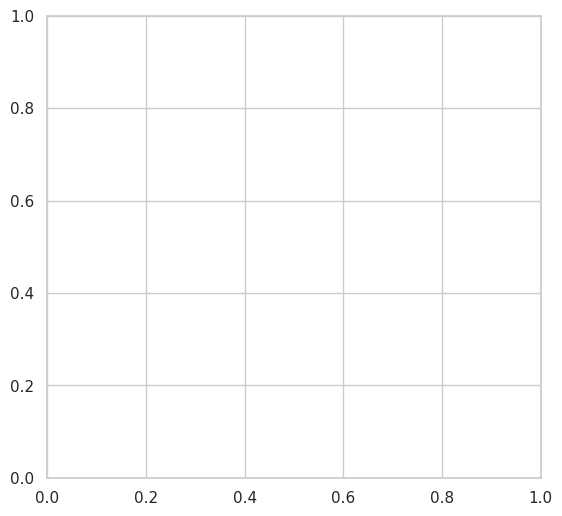

In [17]:
def num_summary(dataframe, numerical_col, target_col, quantiles=None, plot=False):
    """
    Generate a summary for a numerical column in a DataFrame, including summary statistics, and optional plots.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        numerical_col (str): The name of the numerical column to summarize.
        target_col (str): The name of the target column for grouping the summary.
        quantiles (list of float, optional): Custom quantiles for summary statistics. Default is None.
        plot (bool, optional): Whether to generate plots (histogram and box plot). Default is False.

    Returns:
        None
    """
    if quantiles is None:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    summary = dataframe[numerical_col].describe(percentiles=quantiles).T

    summary_by_target = dataframe.groupby(target_col)[numerical_col].describe(percentiles=quantiles).T

    print(f"\nStatistics for '{numerical_col}' Grouped by {target_col}")
    print(summary_by_target)

    if plot:
        plt.figure(figsize=(14, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe, x=numerical_col, hue=target_col, bins=20, palette='Set1', kde=True)
        plt.title(f"{numerical_col} Histogram")
        plt.xlabel(numerical_col)

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=target_col, y=numerical_col, data=dataframe, palette='Set1')
        plt.title(f"{numerical_col} Box Plot")

        plt.tight_layout()
        plt.show()
for col in num_cols:
    num_summary(df, col, "DRK_YN", plot=True)

We can look at the correlation between the features with a graph.

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    """
    Identify columns in a DataFrame with high correlation to each other.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        plot (bool, optional): Whether to plot the correlation matrix. Default is False.
        corr_th (float, optional): The correlation threshold above which columns are considered highly correlated. Default is 0.90.

    Returns:
        list: A list of column names that are highly correlated.
    """
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (24, 24)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

high_corr_cols = high_correlated_cols(df, True)

## **Feature Engineering**

Feature engineering is the process of selecting, transforming, or creating new features (variables) from your raw data to improve the performance of machine learning models. It involves identifying relevant information in your data, removing noise, and creating meaningful input features that can help algorithms better understand and make predictions from the data. The goal is to enhance the model's ability to find patterns and make accurate predictions.

In [ ]:
# BMI = weight(kg) / (height(m)^2)
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)


conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30)
]

# labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, float('inf')], labels=['0', '1', '2', '3'])

# Mean arterial pressure (MAP) = DBP + (SBP - DBP) / 3
df['MAP'] = df['DBP'] + (df['SBP'] - df['DBP']) / 3

# Liver_Enzyme_Ratio = SGOT_AST / SGOT_ALT
df['Liver_Enzyme_Ratio'] = df['SGOT_AST'] / df['SGOT_ALT']


# Anemia_Indicator if hemoglobin < 12 --> anemia
anemia_threshold = 12
df['Anemia_Indicator'] = (df['hemoglobin'] < anemia_threshold).astype(int)

Let's check the correlation again.

In [ ]:
high_corr_cols = high_correlated_cols(df, True)

Let's check our data for the new features we added.

In [ ]:
df.columns

In [ ]:
df.head()

## **Encoding and Scaling**

In [ ]:
df.nunique()

We have already label encoded "sex", "DRK_YN" and "SMK_stat_type_cd" to handle the data more efficiently, so let's get to scaling. We are going to use MinMaxScaler() and we are going to use a smaller subset of our data to reduce running time. Models' training with full data are in train.py.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
smaller_dataset = df.sample(n=20000, random_state=42)

columns_to_scale = smaller_dataset.columns.difference(["DRK_YN", "SMK_stat_type_cd"])

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(smaller_dataset[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_dataset = smaller_dataset.copy()
scaled_dataset = scaled_dataset.reset_index(drop=True)  
scaled_dataset[columns_to_scale] = scaled_df

# **Model Training and Evaluation**

Here is the needed visualization functions for train_and_evaluate_models_drinking()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    """
    Plot a confusion matrix for classification evaluation.

    Args:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
        class_names (list): List of class names.
        model_name (str): Name of the model for the plot title.

    Returns:
        None
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Model: Confusion Matrix')
    plt.show()

def plot_classification_report(y_true, y_pred, class_names, model_name):
    """
    Plot a classification report for model evaluation.

    Args:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
        class_names (list): List of class names.
        model_name (str): Name of the model for the plot title.

    Returns:
        None
    """
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Metrics')
    plt.ylabel('Class')
    plt.title(f'{model_name} Model: Classification Report')
    plt.show()

def plot_roc_curve(y_true, y_prob, model_name):
    """
    Plot a Receiver Operating Characteristic (ROC) curve for model evaluation.

    Args:
        y_true (array-like): True target values.
        y_prob (array-like): Predicted probabilities for positive class.
        model_name (str): Name of the model for the plot title.

    Returns:
        None
    """
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} Model (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Model: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Splitting train and test datasets for "DRK_YN" (drinking prediction)

In [ ]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["DRK_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Let's train the model for "DRK_YN"**

In [ ]:
classification_models = {
    'LogisticRegression': LogisticRegression(max_iter=100, C=0.01, n_jobs=-1),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100),
    'NaiveBayes': MultinomialNB(alpha=1.0),
    'XGBoost': XGBClassifier(n_jobs=-1),
    'LightGBM': LGBMClassifier(n_jobs=-1),
}


def train_and_evaluate_models_drinking(models, X_train, X_test, y_train, y_test, confusion_plot=False, classification_plot= False,roc_plot=False):
    """
    Train and evaluate multiple models for a drinking classification problem.

    Args:
        models (dict): A dictionary of model names and their corresponding model objects.
        X_train (array-like): Training feature data.
        X_test (array-like): Testing feature data.
        y_train (array-like): Training target data.
        y_test (array-like): Testing target data.
        confusion_plot (bool): Whether to plot confusion matrices for binary classification.
        classification_plot (bool): Whether to plot a classification report.
        roc_plot (bool): Whether to plot ROC curves for binary classification.

    Returns:
        results (dict): A dictionary of model evaluation results including ROC AUC, Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.
    """
    results = {}

    for model_name, model_conf in models.items():

        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if roc_plot:
            plot_roc_curve(y_test, y_pred, model_name)
        if classification_plot:
            plot_classification_report(y_test, y_pred, ["Yes", "No"] ,model_name)
        if confusion_plot:
            plot_confusion_matrix(y_test, y_pred, ["Yes", "No"],model_name)


        auc_roc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)


        results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix,
        }

        print(f"Model: {model_name}")
        print(f"ROC AUC: {auc_roc}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Confusion Matrix: \n{conf_matrix}\n")

    return results

new_results = train_and_evaluate_models_drinking(
    classification_models, X_train, X_test, y_train, y_test,
    roc_plot=True ,classification_plot=False ,confusion_plot=False)

 We got the best results with RF, LGBM and XGB models. We can tune their hyperparameters to achieve better performance.

### **Tuning Hyperparameters**

Hyperparameter tuning involves optimizing the settings of a machine learning model. These settings, called hyperparameters, are manually adjusted or searched to improve the model's performance. The right hyperparameters are crucial for a model to fit the data accurately. To achieve this, techniques like grid search or random search are used to explore the best hyperparameter combinations. This process is vital as it directly impacts the model's accuracy and effectiveness.

We are going to use RandomizedSearchCV() to explore the best parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

n_iter = 5
param_distributions = {
    "LGBM": {
        "num_leaves": randint(16, 18),
        "max_depth": randint(5, 10),
        "learning_rate": [0.05, 0.01]
    },
    "XGB": {
        "max_depth": randint(2, 4),
        "learning_rate": [0.05 ,0.1, 0.01],
        "n_estimators": randint(100, 201)
    },
    "RF": {
        "n_estimators": randint(100, 201),
        "max_depth": [20, 30],
        "min_samples_split": [2, 5, 10]
    }
}

results = {}
for classifier_name, param_dist in param_distributions.items():
    if classifier_name == "LGBM":
        classifier = LGBMClassifier()  
    elif classifier_name == "XGB":
        classifier = XGBClassifier()  
    elif classifier_name == "RF":
        classifier = RandomForestClassifier()  

    random_search = RandomizedSearchCV(
        classifier,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42  
    )
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    results[classifier_name] = {"best_params": best_params, "best_score": best_score}

# Print the results
for classifier_name, result in results.items():
    print(f"{classifier_name} Best Parameters: {result['best_params']}")
    print(f"{classifier_name} Best Cross-Validation Score: {result['best_score']:.5f}")

### **Ensemble Learning**

Ensemble learning is a powerful machine learning technique that combines the predictions of multiple base models to create a stronger and more accurate overall model. It leverages the wisdom of the crowd, where diverse individual models contribute their insights to produce a more robust and reliable prediction. The key idea behind ensemble learning is that different models may excel in different aspects of a problem, and by aggregating their predictions, the ensemble can mitigate the weaknesses of individual models.

Let's implement it with VotingClassifier().

In [ ]:
from sklearn.ensemble import VotingClassifier
best_params_lgbm = results["LGBM"]["best_params"]
best_params_xgb = results["XGB"]["best_params"]
best_params_rf = results["RF"]["best_params"]

lgbm = LGBMClassifier(**best_params_lgbm)
xgb = XGBClassifier(**best_params_xgb)
rf = RandomForestClassifier(**best_params_rf)

# Create a Voting Classifier with the individual models
drinking_model = VotingClassifier(estimators=[
    ("LGBM", lgbm),
    ("XGB", xgb),
    ("RF", rf)
], voting="soft")  # You can use "hard" or "soft" voting

drinking_model.fit(X_train, y_train)

drinking_predictions = drinking_model.predict(X_test)

accuracy = accuracy_score(y_test, drinking_predictions)

precision = precision_score(y_test, drinking_predictions)

recall = recall_score(y_test, drinking_predictions)

f1 = f1_score(y_test, drinking_predictions)

roc_auc = roc_auc_score(y_test, drinking_predictions)

print("Drinking Prediction Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


## **Let's train the model for "SMK_stat_type_cd"**

Splitting train and test datasets for "SMK_stat_type_cd" (smoking prediction)

In [ ]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
y = scaled_dataset["SMK_stat_type_cd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc_curve(y_true, y_prob, model_name, n_classes):
    """
    Plot a Receiver Operating Characteristic (ROC) curve for multiclass classification.

    Args:
        y_true (array-like): True target values.
        y_prob (array-like): Predicted probabilities for each class.
        model_name (str): Name of the model for the plot title.
        n_classes (int): Number of classes.

    Returns:
        None
    """
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
classification_models = {
    'LogisticRegression': LogisticRegression(max_iter=100, C=0.01, n_jobs=-1),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=10),
    'NaiveBayes': MultinomialNB(alpha=1.0),
    'XGBoost': XGBClassifier(n_jobs=-1),
    'LightGBM': LGBMClassifier(n_jobs=-1),
}


def train_and_evaluate_models_smoking(models, X_train, X_test, y_train, y_test, roc_plot=False):
    """
    Train and evaluate multiple models for a smoking multi-class classification problem.

    Args:
        models (dict): A dictionary of model names and their corresponding model objects.
        X_train (array-like): Training feature data.
        X_test (array-like): Testing feature data.
        y_train (array-like): Training target data.
        y_test (array-like): Testing target data.
        roc_plot (bool): Whether to plot ROC curves for multiclass classification.

    Returns:
        results (dict): A dictionary of model evaluation results including ROC AUC, Accuracy, Precision, Recall, and F1 Score.
    """
    results = {}

    for model_name, model_conf in models.items():

        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)


        if roc_plot:
            plot_multiclass_roc_curve(y_test, model.predict_proba(X_test), model_name, 3)


        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify 'weighted' averaging
        recall = recall_score(y_test, y_pred, average='weighted')  # Specify 'weighted' averaging
        f1 = f1_score(y_test, y_pred, average='weighted')


        results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,

        }

        print(f"Model: {model_name}")
        print(f"ROC AUC: {auc_roc}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}\n")

    return results

new_results = train_and_evaluate_models_smoking(
    classification_models, X_train, X_test, y_train, y_test,
    roc_plot=True)

### **Tuning Hyperparameters**

Hyperparameter tuning involves optimizing the settings of a machine learning model. These settings, called hyperparameters, are manually adjusted or searched to improve the model's performance. The right hyperparameters are crucial for a model to fit the data accurately. To achieve this, techniques like grid search or random search are used to explore the best hyperparameter combinations. This process is vital as it directly impacts the model's accuracy and effectiveness.

We are going to use RandomizedSearchCV to explore the best parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

n_iter = 5
param_distributions = {
    "LGBM": {
        "num_leaves": randint(16, 18),
        "max_depth": randint(5, 10),
        "learning_rate": [0.05, 0.01]
    },
    "XGB": {
        "max_depth": randint(2, 4),
        "learning_rate": [0.05 ,0.1, 0.01],
        "n_estimators": randint(100, 201)
    },
    "RF": {
        "n_estimators": randint(100, 201),
        "max_depth": [20, 30],
        "min_samples_split": [2, 5, 10]
    }
}

results = {}
for classifier_name, param_dist in param_distributions.items():
    if classifier_name == "LGBM":
        classifier = LGBMClassifier()
    elif classifier_name == "XGB":
        classifier = XGBClassifier()
    elif classifier_name == "RF":
        classifier = RandomForestClassifier()
    random_search = RandomizedSearchCV(
        classifier,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    results[classifier_name] = {"best_params": best_params, "best_score": best_score}


for classifier_name, result in results.items():
    print(f"{classifier_name} Best Parameters: {result['best_params']}")
    print(f"{classifier_name} Best Cross-Validation Score: {result['best_score']:.5f}")

### **Ensemble Learning**

Ensemble learning is a powerful machine learning technique that combines the predictions of multiple base models to create a stronger and more accurate overall model. It leverages the wisdom of the crowd, where diverse individual models contribute their insights to produce a more robust and reliable prediction. The key idea behind ensemble learning is that different models may excel in different aspects of a problem, and by aggregating their predictions, the ensemble can mitigate the weaknesses of individual models.

Let's implement it with VotingClassifier().

In [ ]:
from sklearn.preprocessing import label_binarize

best_params_lgbm = results["LGBM"]["best_params"]
best_params_xgb = results["XGB"]["best_params"]
best_params_rf = results["RF"]["best_params"]

lgbm = LGBMClassifier(**best_params_lgbm)
xgb = XGBClassifier(**best_params_xgb)
rf = RandomForestClassifier(**best_params_rf)

smoking_model = VotingClassifier(estimators=[
    ("LGBM", lgbm),
    ("XGB", xgb),
    ("RF", rf)
], voting="soft")

smoking_model.fit(X_train, y_train)

smoking_predictions = smoking_model.predict(X_test)
smoking_predictions_v2 = smoking_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, smoking_predictions)

precision = precision_score(y_test, smoking_predictions, average='weighted')

recall = recall_score(y_test, smoking_predictions, average='weighted')

f1 = f1_score(y_test, smoking_predictions, average='weighted')

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, smoking_predictions_v2, average='macro')

print("Smoking Prediction Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

In [ ]:
expected_feature_names = [
    'sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
    'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
    'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'BMI', 'BMI_Category', 'MAP', 'Liver_Enzyme_Ratio', 'Anemia_Indicator'
]

my_record = X_test.sample(n=1)[expected_feature_names]

import json
json_data = my_record.to_json(orient='records', lines=True)
parsed_data = json.loads(json_data)
pretty_json = json.dumps(parsed_data, indent=4)
print(f"For input:\n{pretty_json}\n")

drinking_prediction = drinking_model.predict(my_record)
predicted_class_drinking = drinking_prediction[0]
print(f"DRK_YN (1 for Yes / 0 for No):\nPrediction: {predicted_class_drinking}\n")

smoking_prediction = smoking_model.predict(my_record)
predicted_class_smoking = smoking_model.classes_[smoking_prediction[0]]
print(f"SMK_stat_type_cd (Smoking Status 0 for Never Smoked) / 1 for Used to Smoke / 2 for Still Smoking)):\nPrediction: {predicted_class_smoking}")

# **Feature Importances**

Feature importances in machine learning represent the relevance of each feature in a model's predictions. It helps identify which features have the most impact on the model's performance. Analyzing feature importances is crucial for feature selection, model improvement, and understanding key factors influencing outcomes.

### **for Drinking Prediction Model**

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in drinking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance

                
                
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Drinking Model Feature Importances')
plt.show()

### **for Smoking Prediction Model**

In [ ]:
feats = {}

# Access and collect feature importances for each individual classifier
for clf_name, clf in smoking_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        for feature, importance in zip(df.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
            if feature in feats:
                feats[feature] += importance
            else:
                feats[feature] = importance

                
                
                
importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', rot=90, figsize=(10, 4))
plt.title('Smoking Model Feature Importances')
plt.show()

## **Curiosity**

In [ ]:
grouped_data = scaled_dataset.groupby(["SMK_stat_type_cd", "DRK_YN"]).size().unstack()

grouped_data.plot(kind="bar", stacked=False)

plt.xlabel("SMK_stat_type_cd")
plt.ylabel("Count")
plt.title("Comparison of DRK_YN by SMK_stat_type_cd")
plt.legend(title="DRK_YN", labels=["0", "1"])

plt.show()

# Thanks for viewing my notebook!